In [1]:
import pandas as pd

# Load cleaned data
cleaned_file_path = 'cleaned_nifty50_data.csv'
nifty50_data = pd.read_csv(cleaned_file_path)

# Check the loaded data
nifty50_data.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,-1,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,-1,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,-1,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,-1,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,-1,816123.0,0.2741


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


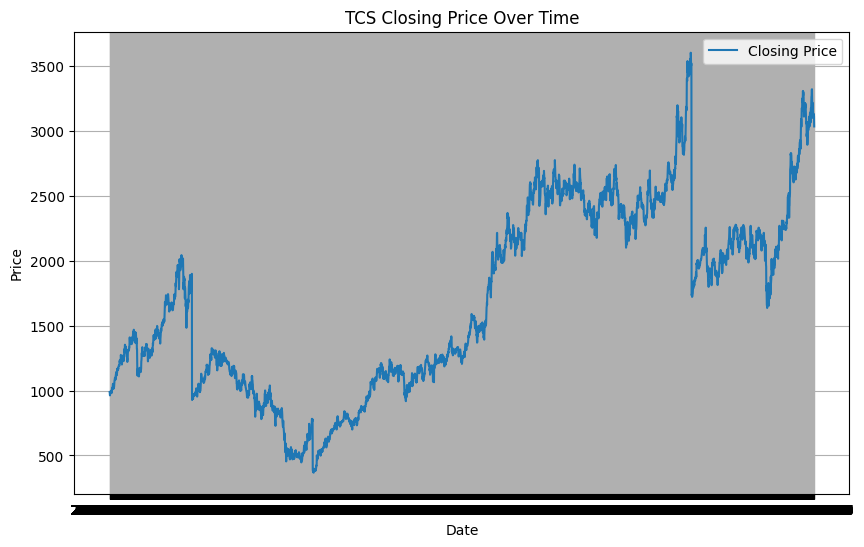

In [3]:
import matplotlib.pyplot as plt

# Select a specific stock symbol (e.g., TCS)
stock_data = nifty50_data[nifty50_data['Symbol'] == 'TCS']

# Plot closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


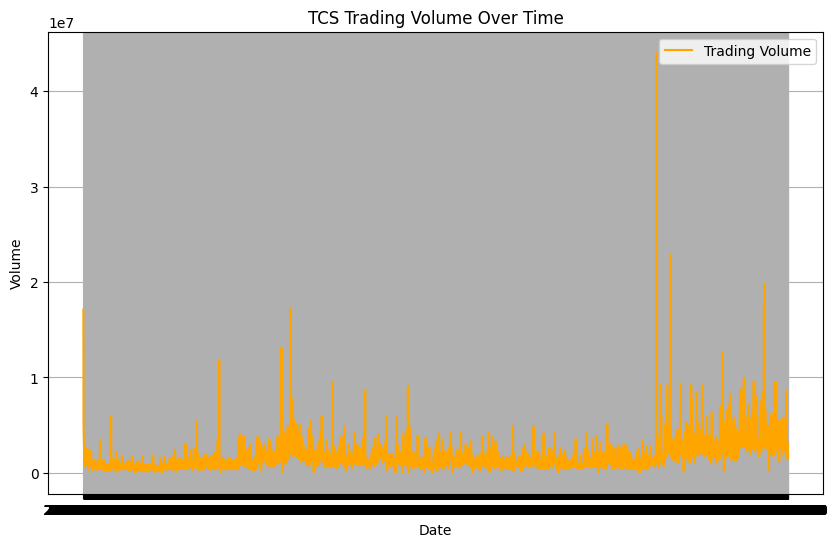

In [4]:
# Plot trading volume over time for TCS
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('TCS Trading Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()


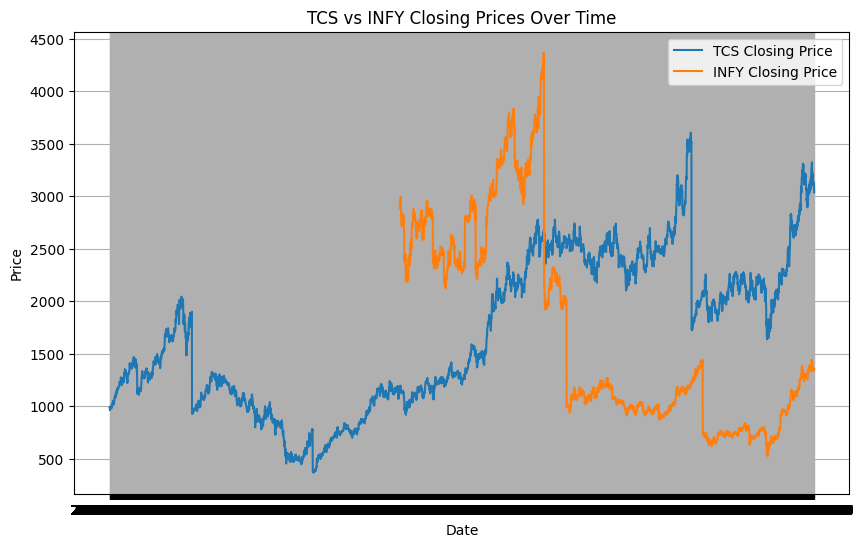

In [5]:
# Select multiple stocks (TCS and INFY)
stocks = nifty50_data[nifty50_data['Symbol'].isin(['TCS', 'INFY'])]

# Plot their closing prices
plt.figure(figsize=(10, 6))
for symbol in ['TCS', 'INFY']:
    stock_subset = stocks[stocks['Symbol'] == symbol]
    plt.plot(stock_subset['Date'], stock_subset['Close'], label=f'{symbol} Closing Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS vs INFY Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


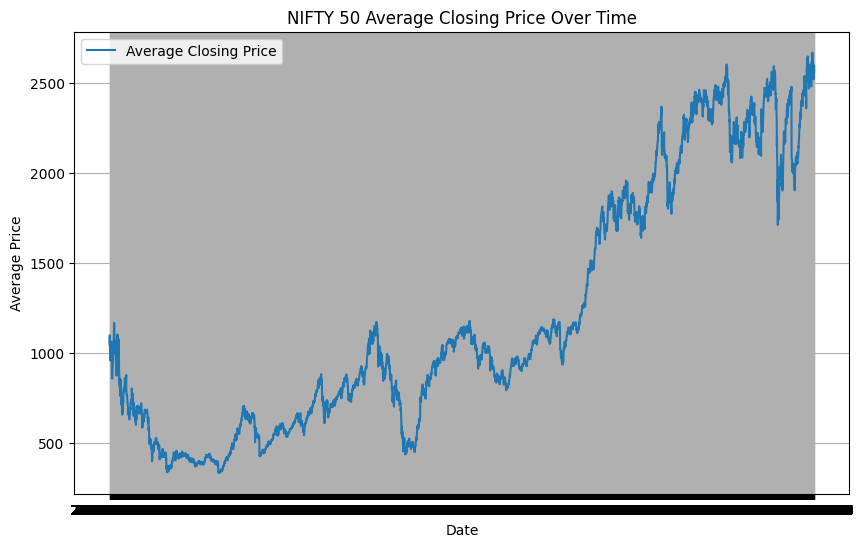

In [6]:
# Group by date and calculate the mean closing price for all stocks
average_daily_close = nifty50_data.groupby('Date')['Close'].mean()

# Plot the average closing price
plt.figure(figsize=(10, 6))
plt.plot(average_daily_close.index, average_daily_close.values, label='Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('NIFTY 50 Average Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Create a pivot table with 'Date' as index and stock 'Close' prices
pivot_data = nifty50_data.pivot(index='Date', columns='Symbol', values='Close')

# Calculate correlation matrix
correlation_matrix = pivot_data.corr()

# Display the correlation matrix
correlation_matrix


Symbol,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJAUTOFIN,BAJFINANCE,BHARTI,BHARTIARTL,BPCL,...,TISCO,TITAN,ULTRACEMCO,UNIPHOS,UPL,UTIBANK,VEDL,WIPRO,ZEEL,ZEETELE
Symbol,,,,,,,,,,,,,,,,,,,,,
ADANIPORTS,1.000000,-0.284485,-0.515243,0.884973,0.828514,NaN,0.309480,NaN,0.657940,-0.078089,...,NaN,0.810692,0.931173,0.671745,0.502766,NaN,0.390486,-0.295692,0.350159,NaN
ASIANPAINT,-0.284485,1.000000,0.522085,-0.142756,-0.126969,0.639534,-0.369185,0.817433,-0.309932,0.278324,...,0.347299,0.363914,0.066820,-0.578530,0.310594,0.922005,-0.125771,-0.373138,-0.453292,0.188907
AXISBANK,-0.515243,0.522085,1.000000,-0.339165,-0.444023,0.876948,-0.486254,NaN,-0.231015,-0.079269,...,NaN,0.282244,-0.484521,-0.184892,-0.358233,NaN,0.108786,0.216916,-0.436013,NaN
BAJAJ-AUTO,0.884973,-0.142756,-0.339165,1.000000,0.790352,0.873081,0.484588,NaN,-0.290331,0.085300,...,NaN,-0.112726,0.915311,-0.219488,0.594294,NaN,0.394303,-0.126111,0.624098,NaN
BAJAJFINSV,0.828514,-0.126969,-0.444023,0.790352,1.000000,0.548715,0.331304,NaN,0.093799,-0.272042,...,NaN,0.025171,0.890638,-0.040263,0.526871,NaN,0.133741,-0.512063,0.389890,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTIBANK,NaN,0.922005,NaN,NaN,NaN,0.893815,NaN,0.978123,0.930254,0.555799,...,0.889698,0.963111,0.881825,-0.521558,NaN,1.000000,NaN,-0.519263,0.826917,-0.042847
VEDL,0.390486,-0.125771,0.108786,0.394303,0.133741,NaN,-0.575140,NaN,0.021893,-0.246084,...,NaN,-0.004020,0.333936,NaN,0.701697,NaN,1.000000,-0.216031,0.665961,NaN
WIPRO,-0.295692,-0.373138,0.216916,-0.126111,-0.512063,-0.499489,0.243413,-0.748119,-0.063669,-0.368166,...,-0.419752,-0.325497,-0.415160,0.462604,-0.469149,-0.519263,-0.216031,1.000000,0.054198,0.770214


In [8]:
# Group by 'Symbol' to calculate average closing price and trading volume per stock
stock_features = nifty50_data.groupby('Symbol').agg({
    'Close': 'mean', 
    'Volume': 'mean'
}).reset_index()

# Rename columns for clarity
stock_features.columns = ['Symbol', 'Avg_Close', 'Avg_Volume']

# Check the data
stock_features.head()


,Symbol,Avg_Close,Avg_Volume
0,ADANIPORTS,294.111766,3.909287e+06
1,ASIANPAINT,1247.410903,5.096721e+05
2,AXISBANK,824.058898,6.916522e+06
3,BAJAJ-AUTO,2190.412196,4.114639e+05
4,BAJAJFINSV,2758.657451,2.315312e+05


In [9]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale (Avg_Close and Avg_Volume)
scaler = StandardScaler()

# Apply standard scaling
scaled_features = scaler.fit_transform(stock_features[['Avg_Close', 'Avg_Volume']])

# Create a new dataframe with the scaled features
scaled_stock_features = pd.DataFrame(scaled_features, columns=['Scaled_Avg_Close', 'Scaled_Avg_Volume'])
scaled_stock_features['Symbol'] = stock_features['Symbol']

# Check the scaled features
scaled_stock_features.head()


,Scaled_Avg_Close,Scaled_Avg_Volume,Symbol
0,-0.573753,0.274053,ADANIPORTS
1,0.065675,-0.792660,ASIANPAINT
2,-0.218289,1.217647,AXISBANK
3,0.698196,-0.823475,BAJAJ-AUTO
4,1.079348,-0.879934,BAJAJFINSV


In [11]:
from sklearn.cluster import KMeans

# Set the number of clusters (you can try different values)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model on the scaled features
scaled_stock_features['Cluster'] = kmeans.fit_predict(scaled_stock_features[['Scaled_Avg_Close', 'Scaled_Avg_Volume']])

# Check the clusters assigned to each stock
scaled_stock_features.head()


,Scaled_Avg_Close,Scaled_Avg_Volume,Symbol,Cluster
0,-0.573753,0.274053,ADANIPORTS,2
1,0.065675,-0.792660,ASIANPAINT,0
2,-0.218289,1.217647,AXISBANK,2
3,0.698196,-0.823475,BAJAJ-AUTO,0
4,1.079348,-0.879934,BAJAJFINSV,0


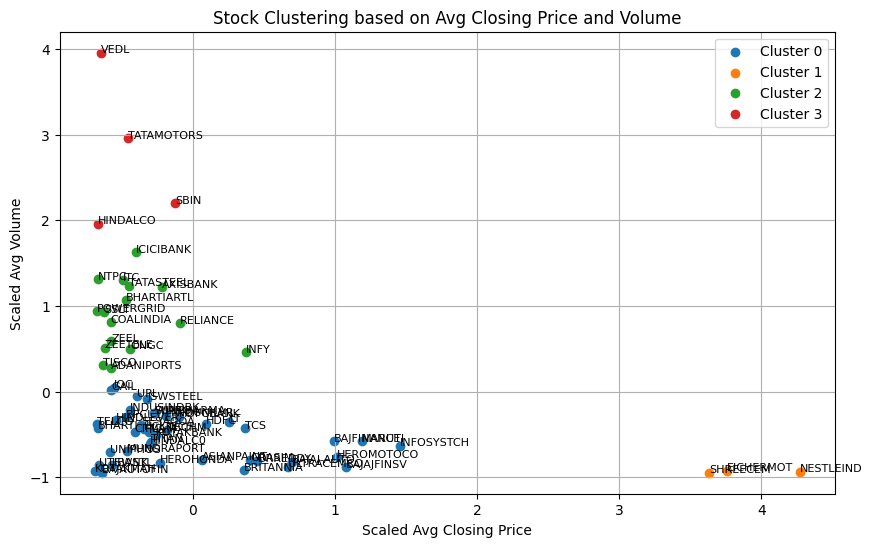

In [12]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 6))

# Iterate through the clusters and plot them
for cluster in range(4):
    cluster_data = scaled_stock_features[scaled_stock_features['Cluster'] == cluster]
    plt.scatter(cluster_data['Scaled_Avg_Close'], cluster_data['Scaled_Avg_Volume'], label=f'Cluster {cluster}')
    
    # Adding labels for each stock
    for i in range(len(cluster_data)):
        plt.text(cluster_data['Scaled_Avg_Close'].values[i], 
                 cluster_data['Scaled_Avg_Volume'].values[i], 
                 cluster_data['Symbol'].values[i], 
                 fontsize=8)

# Label axes
plt.xlabel('Scaled Avg Closing Price')
plt.ylabel('Scaled Avg Volume')

# Title and legend
plt.title('Stock Clustering based on Avg Closing Price and Volume')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

